In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    adjusted_rand_score
)
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [110]:
df1 = pd.read_csv("data/S07-hw-dataset-01.csv")

display(df1.head())
display(df1.info())
display(df1.describe())

missing_counts = df1.isna().sum()
missing_ratio = missing_counts / len(df1)
print("\nПропуски по столбцам (кол-во / доля):")
for col in df1.columns:
    print(f"{col}: {missing_counts[col]} / {missing_ratio[col]:.2f}")

sample_id_df1 = df1["sample_id"]
X_df1 = df1.drop(columns=["sample_id"])

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
0,0,-0.536647,-69.812900,-0.002657,71.743147,-11.396498,-12.291287,-6.836847,-0.504094
1,1,15.230731,52.727216,-1.273634,-104.123302,11.589643,34.316967,-49.468873,0.390356
2,2,18.542693,77.317150,-1.321686,-111.946636,10.254346,25.892951,44.595250,0.325893
3,3,-12.538905,-41.709458,0.146474,16.322124,1.391137,2.014316,-39.930582,0.139297
4,4,-6.903056,61.833444,-0.022466,-42.631335,3.107154,-5.471054,7.001149,0.131213


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


None

,sample_id,f01,f02,f03,f04,f05,f06,f07,f08
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,5999.50000,-2.424716,19.107804,-0.222063,-8.284501,-0.190717,0.962972,0.033724,0.007638
std,3464.24595,11.014315,60.790338,0.500630,59.269838,7.026435,14.794713,59.541782,0.607053
min,0.00000,-19.912573,-92.892652,-1.590979,-134.303679,-11.869169,-20.521164,-215.098834,-2.633469
25%,2999.75000,-9.472623,-40.282955,-0.125145,-48.345007,-5.132473,-8.807706,-39.900520,-0.401483
50%,5999.50000,-6.869404,54.069335,-0.031753,16.211728,0.444730,-6.134169,-0.578494,0.005306
75%,8999.25000,0.523841,70.280739,0.054980,28.067178,3.942368,2.334426,39.719821,0.410132
max,11999.00000,24.403381,112.229523,0.512277,75.088604,13.717091,41.452857,213.381767,2.490745



Пропуски по столбцам (кол-во / доля):
sample_id: 0 / 0.00
f01: 0 / 0.00
f02: 0 / 0.00
f03: 0 / 0.00
f04: 0 / 0.00
f05: 0 / 0.00
f06: 0 / 0.00
f07: 0 / 0.00
f08: 0 / 0.00


In [111]:
df2 = pd.read_csv("data/S07-hw-dataset-02.csv")

display(df2.head())
display(df2.info())
display(df2.describe())

missing_counts = df2.isna().sum()
missing_ratio = missing_counts / len(df2)
print("\nПропуски по столбцам (кол-во / доля):")
for col in df2.columns:
    print(f"{col}: {missing_counts[col]} / {missing_ratio[col]:.2f}")
    
sample_id_df2 = df2["sample_id"]
X_df2 = df2.drop(columns=["sample_id"])

,sample_id,x1,x2,z_noise
0,0,0.098849,-1.846034,21.288122
1,1,-1.024516,1.829616,6.072952
2,2,-1.094178,-0.158545,-18.938342
3,3,-1.612808,-1.565844,-11.629462
4,4,1.659901,-2.133292,1.895472


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB


None

,sample_id,x1,x2,z_noise
count,8000.00000,8000.000000,8000.000000,8000.000000
mean,3999.50000,0.478867,0.241112,0.110454
std,2309.54541,0.955138,0.663195,8.097716
min,0.00000,-2.487352,-2.499237,-34.056074
25%,1999.75000,-0.116516,-0.242357,-5.392210
50%,3999.50000,0.490658,0.241092,0.132470
75%,5999.25000,1.085263,0.726526,5.655605
max,7999.00000,2.987555,2.995553,29.460076



Пропуски по столбцам (кол-во / доля):
sample_id: 0 / 0.00
x1: 0 / 0.00
x2: 0 / 0.00
z_noise: 0 / 0.00


In [112]:
df3 = pd.read_csv("data/S07-hw-dataset-03.csv")

display(df3.head())
display(df3.info())
display(df3.describe())

missing_counts = df3.isna().sum()
missing_ratio = missing_counts / len(df3)
print("\nПропуски по столбцам (кол-во / доля):")
for col in df3.columns:
    print(f"{col}: {missing_counts[col]} / {missing_ratio[col]:.2f}")

sample_id_df3 = df3["sample_id"]
X_df3 = df3.drop(columns=["sample_id"])

,sample_id,x1,x2,f_corr,f_noise
0,0,-2.710470,4.997107,-1.015703,0.718508
1,1,8.730238,-8.787416,3.953063,-1.105349
2,2,-1.079600,-2.558708,0.976628,-3.605776
3,3,6.854042,1.560181,1.760614,-1.230946
4,4,9.963812,-8.869921,2.966583,0.915899


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB


None

,sample_id,x1,x2,f_corr,f_noise
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.246296,1.033764,0.212776,-0.027067
std,4330.271354,4.592421,4.710791,1.530017,2.506375
min,0.000000,-9.995585,-9.980853,-5.212038,-8.785884
25%,3749.750000,-1.782144,-2.666393,-0.966224,-1.731128
50%,7499.500000,0.664226,1.831257,0.296508,-0.052391
75%,11249.250000,4.435671,4.969630,1.390273,1.673831
max,14999.000000,16.207863,14.271153,5.795876,11.266865



Пропуски по столбцам (кол-во / доля):
sample_id: 0 / 0.00
x1: 0 / 0.00
x2: 0 / 0.00
f_corr: 0 / 0.00
f_noise: 0 / 0.00


In [113]:
num_features_1 = X_df1.columns.tolist()

preprocessor_1 = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_1)
    ]
)

pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor_1)])

X_df1 = pipeline_1.fit_transform(X_df1)

In [114]:
num_features_2 = X_df2.columns.tolist()

preprocessor_2 = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_2)
    ]
)

pipeline_2 = Pipeline(steps=[('preprocessor', preprocessor_2)])

X_df2 = pipeline_2.fit_transform(X_df2)

In [115]:
num_features_3 = X_df3.columns.tolist()

preprocessor_3 = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_3)
    ]
)

pipeline_3 = Pipeline(steps=[('preprocessor', preprocessor_3)])

X_df3 = pipeline_3.fit_transform(X_df3)

In [116]:
def kmeans_silhouette(X, k_range=range(2, 11), random_state=42, n_init=10):
    scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state, n_init=n_init)
        labels = kmeans.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

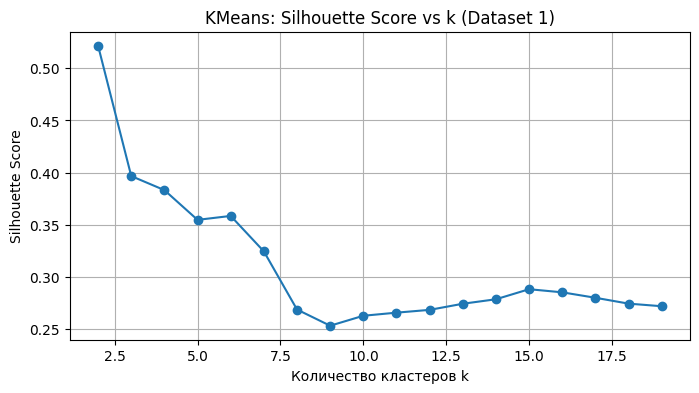

Лучшее k по силуэту: 2
KMeans:
Silhouette Score: 0.522
Davies-Bouldin Score: 0.685
Calinski-Harabasz Score: 11786.955


In [117]:
k_range = range(2, 20)
sil_scores = kmeans_silhouette(X_df1, k_range)

plt.figure(figsize=(8,4))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.title("KMeans: Silhouette Score vs k (Dataset 1)")
plt.grid(True)
plt.savefig("artifacts/figures/silhouette_vs_k_1.png")
plt.show()

best_k = k_range[np.argmax(sil_scores)]
print("Лучшее k по силуэту:", best_k)

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans_df1 = kmeans_final.fit_predict(X_df1)

sil_k = silhouette_score(X_df1, labels_kmeans_df1)
db_k = davies_bouldin_score(X_df1, labels_kmeans_df1)
ch_k = calinski_harabasz_score(X_df1, labels_kmeans_df1)

print("KMeans:")
print(f"Silhouette Score: {sil_k:.3f}")
print(f"Davies-Bouldin Score: {db_k:.3f}")
print(f"Calinski-Harabasz Score: {ch_k:.3f}")

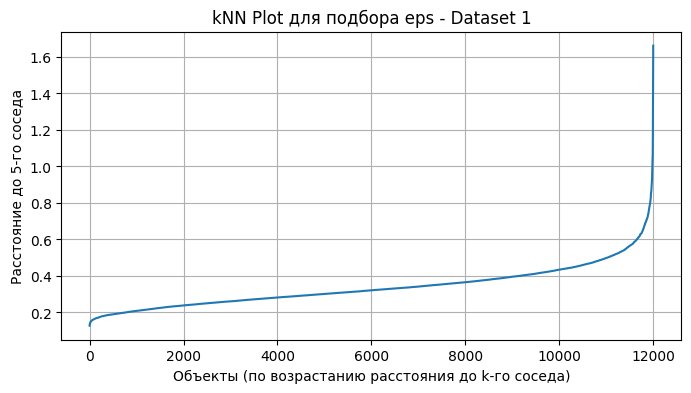

In [118]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_df1)
distances, _ = neighbors_fit.kneighbors(X_df1)

k_distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel("Объекты (по возрастанию расстояния до k-го соседа)")
plt.ylabel(f"Расстояние до {min_samples}-го соседа")
plt.title("kNN Plot для подбора eps - Dataset 1")
plt.grid(True)
plt.show()


In [119]:
eps_value = 0.7
dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_df1)

n_noise = np.sum(labels_dbscan == -1)
noise_ratio = n_noise / len(labels_dbscan)
print(f"DBSCAN (eps={eps_value}):")
print(f"Доля шума: {noise_ratio:.3f}")

mask = labels_dbscan != -1
if np.sum(mask) > 1:
    sil_db = silhouette_score(X_df1[mask], labels_dbscan[mask])
    db_db = davies_bouldin_score(X_df1[mask], labels_dbscan[mask])
    ch_db = calinski_harabasz_score(X_df1[mask], labels_dbscan[mask])
    print(f"Silhouette Score (non-noise): {sil_db:.3f}")
    print(f"Davies-Bouldin Score (non-noise): {db_db:.3f}")
    print(f"Calinski-Harabasz Score (non-noise): {ch_db:.3f}")
else:
    print("Недостаточно кластеров для метрик (только шум)")

DBSCAN (eps=0.7):
Доля шума: 0.004
Silhouette Score (non-noise): 0.380
Davies-Bouldin Score (non-noise): 1.261
Calinski-Harabasz Score (non-noise): 8354.891


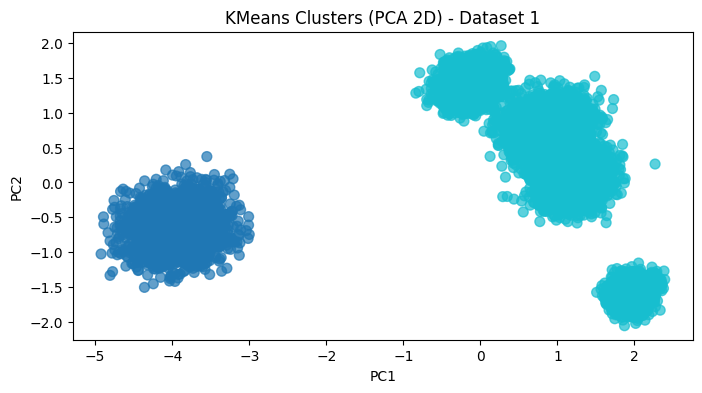

In [120]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df1)

plt.figure(figsize=(8,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans_df1, cmap='tab10', s=50, alpha=0.7)
plt.title("KMeans Clusters (PCA 2D) - Dataset 1")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("artifacts/figures/KMeans_Clusters_1.png")
plt.show()

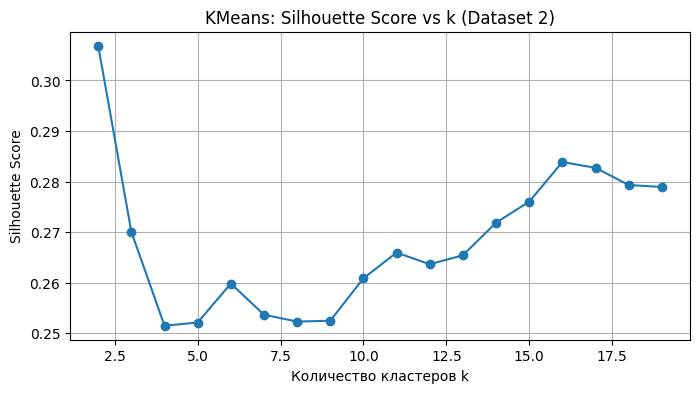

Лучшее k по силуэту: 2
KMeans датасет2:
Silhouette Score: 0.307
Davies-Bouldin Score: 1.323
Calinski-Harabasz Score: 3573.393


In [121]:
k_range = range(2, 20)
sil_scores = kmeans_silhouette(X_df2, k_range)

plt.figure(figsize=(8,4))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.title("KMeans: Silhouette Score vs k (Dataset 2)")
plt.grid(True)
plt.savefig("artifacts/figures/silhouette_vs_k_2.png")
plt.show()

best_k = k_range[np.argmax(sil_scores)]
print("Лучшее k по силуэту:", best_k)

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans_df2 = kmeans_final.fit_predict(X_df2)

sil_k = silhouette_score(X_df2, labels_kmeans_df2)
db_k = davies_bouldin_score(X_df2, labels_kmeans_df2)
ch_k = calinski_harabasz_score(X_df2, labels_kmeans_df2)

print("KMeans датасет2:")
print(f"Silhouette Score: {sil_k:.3f}")
print(f"Davies-Bouldin Score: {db_k:.3f}")
print(f"Calinski-Harabasz Score: {ch_k:.3f}")

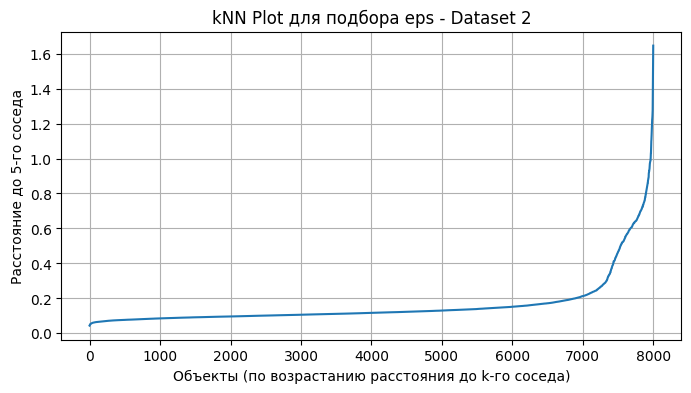

In [122]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_df2)
distances, _ = neighbors_fit.kneighbors(X_df2)

k_distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel("Объекты (по возрастанию расстояния до k-го соседа)")
plt.ylabel(f"Расстояние до {min_samples}-го соседа")
plt.title("kNN Plot для подбора eps - Dataset 2")
plt.grid(True)
plt.show()


In [123]:
eps_value = 0.5
dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_df2)

n_noise = np.sum(labels_dbscan == -1)
noise_ratio = n_noise / len(labels_dbscan)
print(f"DBSCAN (eps={eps_value}):")
print(f"Доля шума: {noise_ratio:.3f}")

mask = labels_dbscan != -1
if np.sum(mask) > 1:
    sil_db = silhouette_score(X_df2[mask], labels_dbscan[mask])
    db_db = davies_bouldin_score(X_df2[mask], labels_dbscan[mask])
    ch_db = calinski_harabasz_score(X_df2[mask], labels_dbscan[mask])
    print(f"Silhouette Score (non-noise): {sil_db:.3f}")
    print(f"Davies-Bouldin Score (non-noise): {db_db:.3f}")
    print(f"Calinski-Harabasz Score (non-noise): {ch_db:.3f}")
else:
    print("Недостаточно кластеров для метрик (только шум)")

DBSCAN (eps=0.5):
Доля шума: 0.045
Silhouette Score (non-noise): -0.058
Davies-Bouldin Score (non-noise): 0.790
Calinski-Harabasz Score (non-noise): 49.822


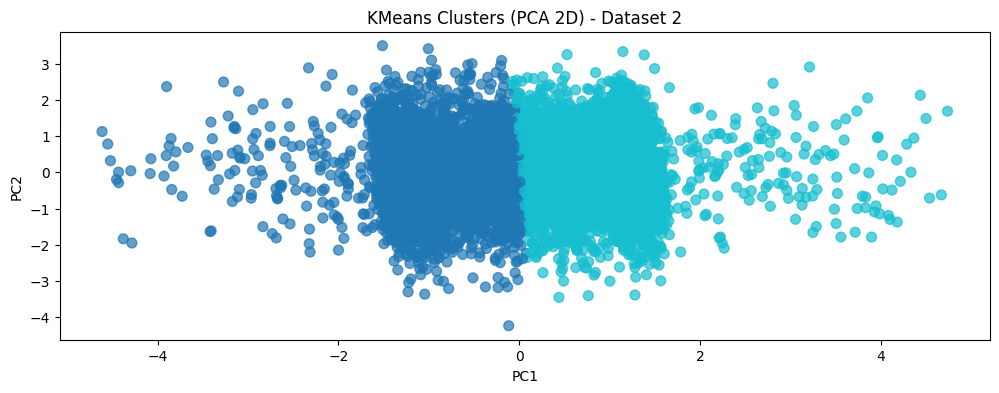

In [124]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df2)

plt.figure(figsize=(12,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans_df2, cmap='tab10', s=50, alpha=0.7)
plt.title("KMeans Clusters (PCA 2D) - Dataset 2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("artifacts/figures/KMeans_Clusters_2.png")
plt.show()

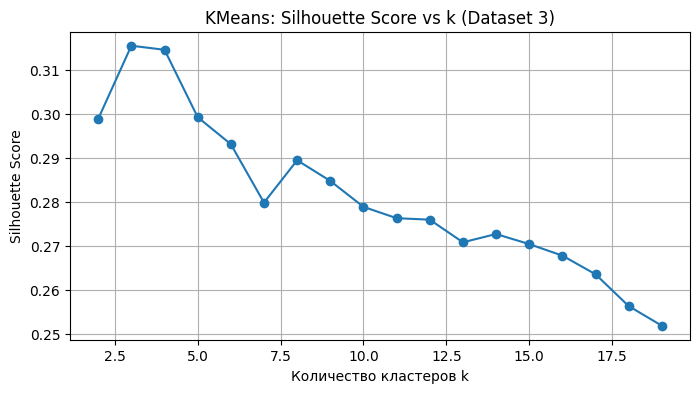

Лучшее k по силуэту: 3
KMeans датасет3:
Silhouette Score: 0.316
Davies-Bouldin Score: 1.158
Calinski-Harabasz Score: 6957.163


In [125]:
k_range = range(2, 20)
sil_scores = kmeans_silhouette(X_df3, k_range)

plt.figure(figsize=(8,4))
plt.plot(k_range, sil_scores, marker='o')
plt.xlabel("Количество кластеров k")
plt.ylabel("Silhouette Score")
plt.title("KMeans: Silhouette Score vs k (Dataset 3)")
plt.grid(True)
plt.savefig("artifacts/figures/silhouette_vs_k_3.png")
plt.show()

best_k = k_range[np.argmax(sil_scores)]
print("Лучшее k по силуэту:", best_k)

kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans_df3 = kmeans_final.fit_predict(X_df3)

sil_k = silhouette_score(X_df3, labels_kmeans_df3)
db_k = davies_bouldin_score(X_df3, labels_kmeans_df3)
ch_k = calinski_harabasz_score(X_df3, labels_kmeans_df3)

print("KMeans датасет3:")
print(f"Silhouette Score: {sil_k:.3f}")
print(f"Davies-Bouldin Score: {db_k:.3f}")
print(f"Calinski-Harabasz Score: {ch_k:.3f}")

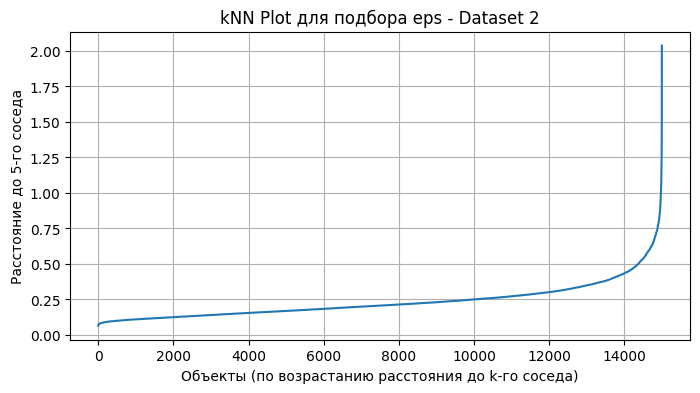

In [126]:
min_samples = 5
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_df3)
distances, _ = neighbors_fit.kneighbors(X_df3)

k_distances = np.sort(distances[:, min_samples-1])

plt.figure(figsize=(8,4))
plt.plot(k_distances)
plt.xlabel("Объекты (по возрастанию расстояния до k-го соседа)")
plt.ylabel(f"Расстояние до {min_samples}-го соседа")
plt.title("kNN Plot для подбора eps - Dataset 2")
plt.grid(True)
plt.show()

In [127]:
eps_value = 0.45
dbscan = DBSCAN(eps=eps_value, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_df3)

n_noise = np.sum(labels_dbscan == -1)
noise_ratio = n_noise / len(labels_dbscan)
print(f"DBSCAN (eps={eps_value}):")
print(f"Доля шума: {noise_ratio:.3f}")

mask = labels_dbscan != -1
if np.sum(mask) > 1:
    sil_db = silhouette_score(X_df3[mask], labels_dbscan[mask])
    db_db = davies_bouldin_score(X_df3[mask], labels_dbscan[mask])
    ch_db = calinski_harabasz_score(X_df3[mask], labels_dbscan[mask])
    print(f"Silhouette Score (non-noise): {sil_db:.3f}")
    print(f"Davies-Bouldin Score (non-noise): {db_db:.3f}")
    print(f"Calinski-Harabasz Score (non-noise): {ch_db:.3f}")
else:
    print("Недостаточно кластеров для метрик (только шум)")

DBSCAN (eps=0.45):
Доля шума: 0.032
Silhouette Score (non-noise): 0.055
Davies-Bouldin Score (non-noise): 1.225
Calinski-Harabasz Score (non-noise): 826.914


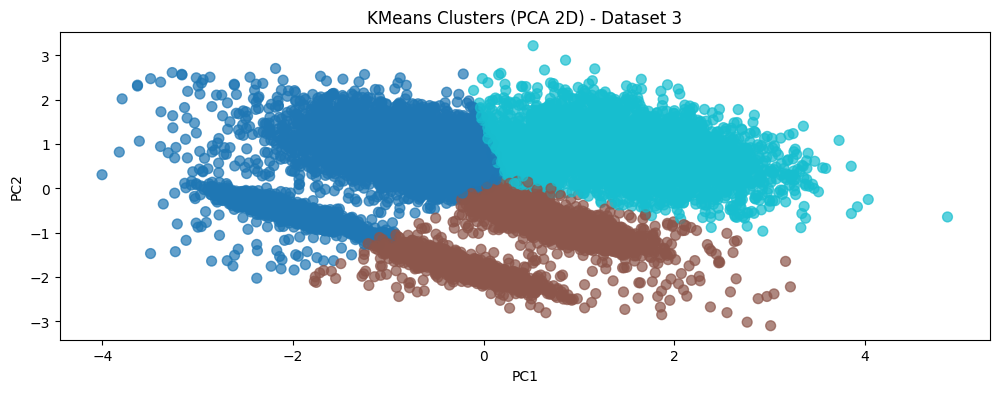

In [128]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_df3)

plt.figure(figsize=(12,4))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans_df3, cmap='tab10', s=50, alpha=0.7)
plt.title("KMeans Clusters (PCA 2D) - Dataset 3")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig("artifacts/figures/KMeans_Clusters_3.png")
plt.show()

In [129]:
n_runs = 5
k = 2  # лучшее k по силуэту для Dataset 1
labels_list = []

for i in range(n_runs):
    kmeans = KMeans(n_clusters=k, random_state=i, n_init=10)
    labels = kmeans.fit_predict(X_df1)
    labels_list.append(labels)

ari_matrix = np.zeros((n_runs, n_runs))

for i in range(n_runs):
    for j in range(n_runs):
        ari_matrix[i,j] = adjusted_rand_score(labels_list[i], labels_list[j])

print("Матрица ARI между разными запусками KMeans:")
print(np.round(ari_matrix, 3))

ari_values = ari_matrix[np.triu_indices(n_runs, k=1)]
print(f"\nСреднее ARI между разными запусками: {ari_values.mean():.3f}")

Матрица ARI между разными запусками KMeans:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

Среднее ARI между разными запусками: 1.000


In [130]:
os.makedirs("artifacts/labels", exist_ok=True)

df_labels = pd.DataFrame({
    "sample_id": sample_id_df1,
    "cluster_label": labels_kmeans_df1
})
df_labels.to_csv("artifacts/labels/labels_hw07_ds1.csv", index=False)

df_labels = pd.DataFrame({
    "sample_id": sample_id_df2,
    "cluster_label": labels_kmeans_df2
})
df_labels.to_csv("artifacts/labels/labels_hw07_ds2.csv", index=False)

df_labels = pd.DataFrame({
    "sample_id": sample_id_df3,
    "cluster_label": labels_kmeans_df3
})
df_labels.to_csv("artifacts/labels/labels_hw07_ds3.csv", index=False)


Dataset 1

Лучший метод: KMeans, k=2, random_state=42, n_init=10.

Итог:
После стандартизации KMeans выделил два чётких кластера с высоким Silhouette Score (0.522) и хорошими значениями Davies-Bouldin и Calinski-Harabasz. DBSCAN с eps=0.7 смог отделить почти весь шум, но метрики хуже, т.к. кластеры менее компактны. Проверка устойчивости KMeans показала ARI=1 для 5 запусков, что подтверждает стабильность разбиения. Выбор KMeans объясняется простой линейной структурой и равномерной плотностью кластеров, алгоритм эффективно справляется с такими данными.

Dataset 2

Лучший метод: KMeans, k=2, random_state=42, n_init=10.

Итог:
Датасет содержит нелинейную структуру, выбросы и один шумовой признак. DBSCAN с eps=0.5 выделил небольшую долю шума, но метрики оказались отрицательными или близкими к нулю, что говорит о слабой кластерной структуре. KMeans с k=2 дал более устойчивое разбиение (Silhouette=0.307), хоть и не идеально, метрики Calinski-Harabasz и Davies-Bouldin выше. Метод выбран потому, что DBSCAN плохо справляется с нелинейными и разреженными областями, а KMeans обеспечивает стабильное разбиение.

Dataset 3

Лучший метод: KMeans, k=3, random_state=42, n_init=10.

Итог:
Датасет характеризуется кластерами разной плотности и фоновым шумом. DBSCAN с eps=0.45 выделил небольшой шум (3.2%), но Silhouette Score и Calinski-Harabasz были очень низкие, что указывает на слабое разделение. KMeans с k=3 показал более выраженные кластеры (Silhouette=0.316, Calinski-Harabasz=6957), хотя метод предполагает одинаковую плотность. Выбор KMeans объясняется его стабильностью и способностью дать понятное разбиение даже на фоне различий в плотности, DBSCAN здесь чувствителен к параметру eps и не может корректно разделить кластеры.